In [279]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [385]:
def f(x: np.float64) -> np.float64:
    return x*np.sin(2 - x)
    #return 1.0 / (1 + 25*x**2)

In [449]:
def equal_partition(a: np.float64, b: np.float64, n: int) -> np.ndarray:
    return np.linspace(a, b, n)

def Chebyschev_partition(a: np.float64, b: np.float64, n: int) -> np.ndarray:
    n -= 1
    get_x = lambda k: 0.5*(a + b) + 0.5*(b - a) * np.cos(np.pi * (2*k + 1)/(2*n + 2))
    x = [get_x(k) for k in range(n, -1, -1)]
    partition = np.array(x)
    return partition

In [450]:
Polynom = namedtuple("Polynom", ["a", "b", "c", "x0", "x1"])
def make_spline(x: np.ndarray, y: np.ndarray, dfa: np.float64):
    spline = []
    n = len(x) - 1
    a, b, c = [0]*n, [0]*n, [0]*n
    for i in range(n):
        a[i] = y[i]
        b[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    c[0] = (dfa - b[0])/(2*x[1])
    spline.append(Polynom(a[0], b[0], c[0], x[0], x[1]))
    for i in range(1, n):
        c[i] = (b[i] - b[i-1])/(2 * x[i+1]) + x[i-1]/x[i+1] * c[i-1]
        spline.append(Polynom(a[i], b[i], c[i], x[i], x[i+1]))
    return spline

In [451]:
def PrintSpline(spline: list):
    for P in spline:
        print(P.a, P.b, P.c, P.x0, P.x1)

In [522]:
a, b = 1, 4
n_dots = 69
x = equal_partition(a, b, n_dots) #100 0.005909864879679992
#x = Chebyschev_partition(a, b, n_dots) #100 0.007819083547945267
y = np.array([f(i) for i in x])
df1 = np.sin(1) - np.cos(1)
spline = make_spline(x, y, df1)

In [525]:
def Spline(arg: np.float64):
    n = len(spline)    
    if arg <= spline[0].x1:
        s = spline[0]
    elif arg >= spline[n - 1].x0:
        s = spline[n - 1]
    else:
        i, j = 0, n - 1
        while i + 1 < j:
            k = i + (j - i) // 2
            if arg <= spline[k].x0: j = k
            else: i = k
        s = spline[i]
    return s.a + s.b*(arg - s.x0) + s.c*(arg - s.x0)*(arg - s.x1)

x = Chebyschev_partition(a, b, 7)
y = np.array([f(i) for i in x])
def Lagrange_Polynom(arg):
    res = 0
    for i in range(len(x)):
        tmp = 1
        for k in range(len(x)):
            if i != k:
                tmp *= (arg - x[k])* 1.0/(x[i] - x[k])
        res += y[i]*tmp
    return res

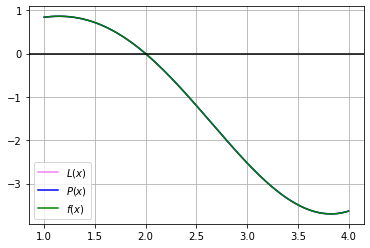

In [527]:
x_data = np.linspace(a, b, 1000)
fig, axs = plt.subplots()
axs.plot(x_data, Lagrange_Polynom(x_data), label="$L(x)$", color="violet")
axs.plot(x_data, np.array([Spline(arg) for arg in x_data]), label="$P(x)$", color="blue")
axs.plot(x_data, f(x_data), label="$f(x)$", color="green")
#axs.plot(x_data, np.array([np.abs(f(arg) - Spline(arg)) for arg in x_data]), label="$RP(t)$", color="red")
#axs.plot(x_data, np.abs(f(x_data) - Lagrange_Polynom(x_data)), label="$RL(t)$", color="blue")
#plt.scatter(x, y, color='orange', s=40, marker='o')
ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='k')
#axs.set(ylim=(-4, 1))
#axs.set(ylim=(-0.001, 0.001))
axs.legend()
axs.grid(True)
#plt.savefig("plot_4.2_all_inter.png", dpi=500)